## Importing the data and necessary libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing the data and applying PCA

1. Dropping Customer ID as it does not provide useful information for clustering
2. Standardising and Normalising the data. This prevents one attribute from having a greater influence on clustering than another as the data is now uniform. 
3. Creating DataFrame of the uniform  data.
4. Applying PCA to reduce the data to 2 dimensions. This data is plotted. 

In [4]:
df1 = df.drop('CUST_ID', axis = 1) 
df1.fillna(method ='bfill', inplace = True) 

In [5]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1) 

In [6]:
# Normalizing the Data 
normalized_df = normalize(df1) 

In [7]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [8]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
  
pcadf.head(10)

,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.315801,-0.045331,0.021005
1,0.315592,-0.156902,0.369849
2,-0.207156,-0.182853,-0.122065
3,-0.294886,-0.115253,-0.105940
4,0.140351,-0.089815,-0.090702
5,0.357316,0.198259,-0.407317
6,-0.196032,0.372616,-0.000407
7,0.114108,-0.126426,-0.256003
8,-0.325109,-0.103615,-0.032240
9,-0.402152,-0.055033,0.042919


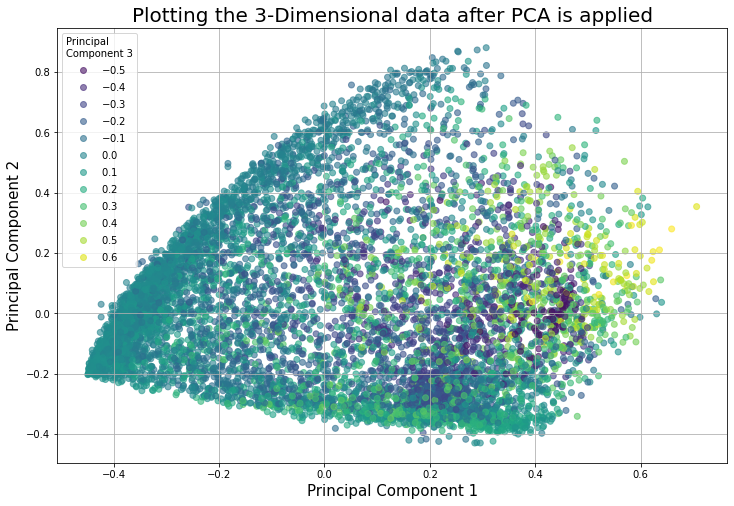

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6)
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.33143791, 0.2751133 , 0.16474062])

## Elbow Method 

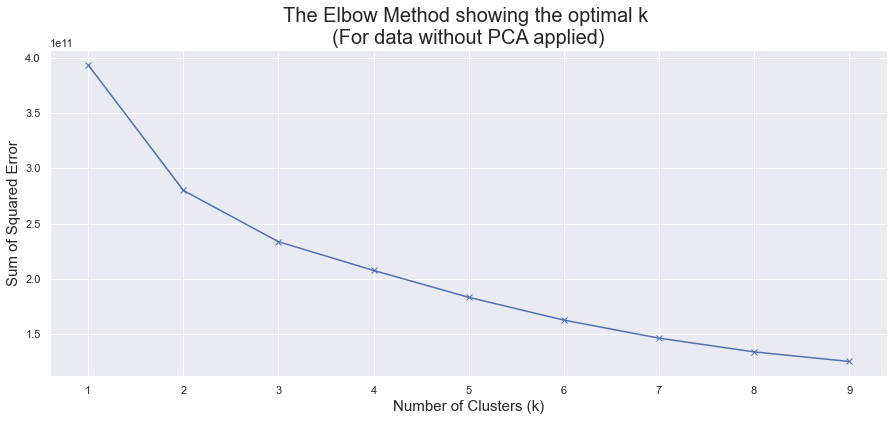

In [20]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k \n(For data without PCA applied)', fontsize = 20)
plt.show()

We will choose 3 as k value here

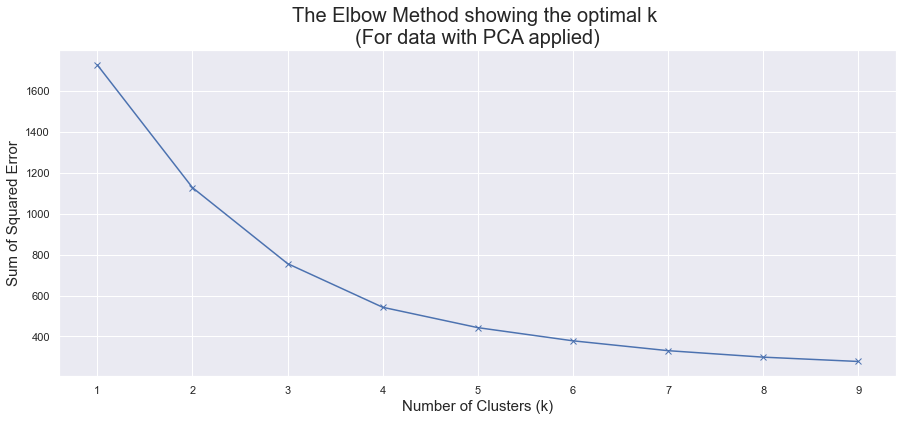

In [21]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k \n(For data with PCA applied)', fontsize = 20)
plt.show()

We will choose k as 3 here 

In [22]:
import matplotlib
matplotlib.rc_file_defaults()

## Applying the Gaussian Mixture Model to cluster our data (PCA-applied) into 3 clusters

In [63]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(pcadf)

GaussianMixture(n_components=3)

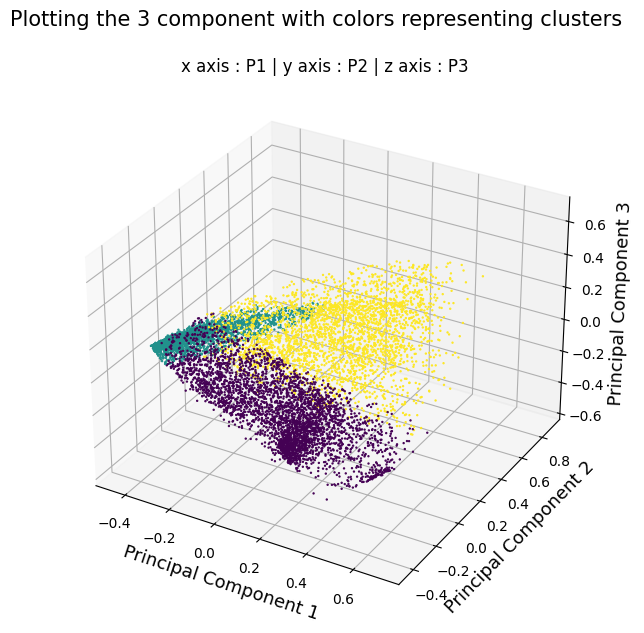

In [61]:
fig = plt.figure(figsize = (7, 7))
plt.suptitle("Plotting the 3 component with colors representing clusters", fontsize = 15)
             
x, s1 = pcadf['Principal Component 1'], "Principal Component 1"
y, s2 = pcadf['Principal Component 2'], "Principal Component 2"
z, s3 = pcadf['Principal Component 3'], "Principal Component 3"

c = gmm.fit_predict(pcadf) 

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = c, s=0.5, alpha = 1)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

## Applying the Gaussian Mixture Model to cluster our data (without PCA) into 3 clusters

In [25]:
gmm1 = GaussianMixture(n_components = 3) 
gmm1.fit(df1)

GaussianMixture(n_components=3)

## External Evaluation Metric

#### A. For data with PCA applied

In [149]:
y_pred = gmm.predict(pcadf)
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']

prediction = pd.concat([pcadf, pred], axis = 1)

clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]

cluster_list = [clus0.values, clus1.values, clus2.values]

#### B. For data without PCA applied

In [150]:
y_pred1 = gmm1.predict(df1)
pred1 = pd.DataFrame(y_pred1)
pred1.columns = ['Type']

prediction1 = pd.concat([df1, pred1], axis = 1)

clus10 = prediction1.loc[prediction1.Type == 0]
clus11 = prediction1.loc[prediction1.Type == 1]
clus12 = prediction1.loc[prediction1.Type == 2]

cluster_list1 = [clus10.values, clus11.values, clus12.values]

### 1. Silhoutte Score

#### A. For data with PCA applied

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pcadf
y = gmm.fit_predict(pcadf)
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, c, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.2861282224600897
k = 3 	--> 	0.2861282224600897
k = 4 	--> 	0.2861282224600897
k = 5 	--> 	0.2861282224600897
k = 6 	--> 	0.2861282224600897
k = 7 	--> 	0.2861282224600897
k = 8 	--> 	0.2861282224600897
k = 9 	--> 	0.2861282224600897
k = 10 	--> 	0.2861282224600897


#### B. For data without PCA applied

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df1
y = gmm1.fit_predict(pcadf)
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, c, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.009982970384250441
k = 3 	--> 	0.009982970384250441
k = 4 	--> 	0.009982970384250441
k = 5 	--> 	0.009982970384250441
k = 6 	--> 	0.009982970384250441
k = 7 	--> 	0.009982970384250441
k = 8 	--> 	0.009982970384250441
k = 9 	--> 	0.009982970384250441
k = 10 	--> 	0.009982970384250441


Thus, data with PCA applied gives better clustering results

### 2. Dunn index

#### A. For data with PCA applied

In [145]:
import base
base.dunn_fast(pcadf, gmm.fit_predict(pcadf))

0.0023043234208522875

#### B. For data without PCA applied

In [146]:
base.dunn_fast(df1, gmm1.fit_predict(df1))

0.00016225635824833765

Even here, we see that Dunn Index gives better results for data with PCA applied

### 3. DB Index

#### A. For data with PCA applied

In [153]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pcadf, y_pred)

1.2252633144502956

#### B. For data without PCA applied

In [155]:
davies_bouldin_score(df1, y_pred1) 

3.7084329037230126

The lower the DB index, the better. Thus, data applied with PCA gives better results